In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt

In [4]:
disease=pd.read_csv('hdp.csv')

In [5]:
disease.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [62]:
disease.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


<Axes: xlabel='male', ylabel='count'>

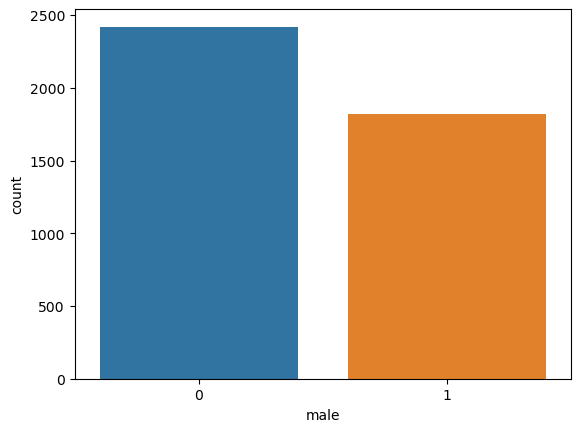

In [10]:
sns.countplot(x='male',data=disease)

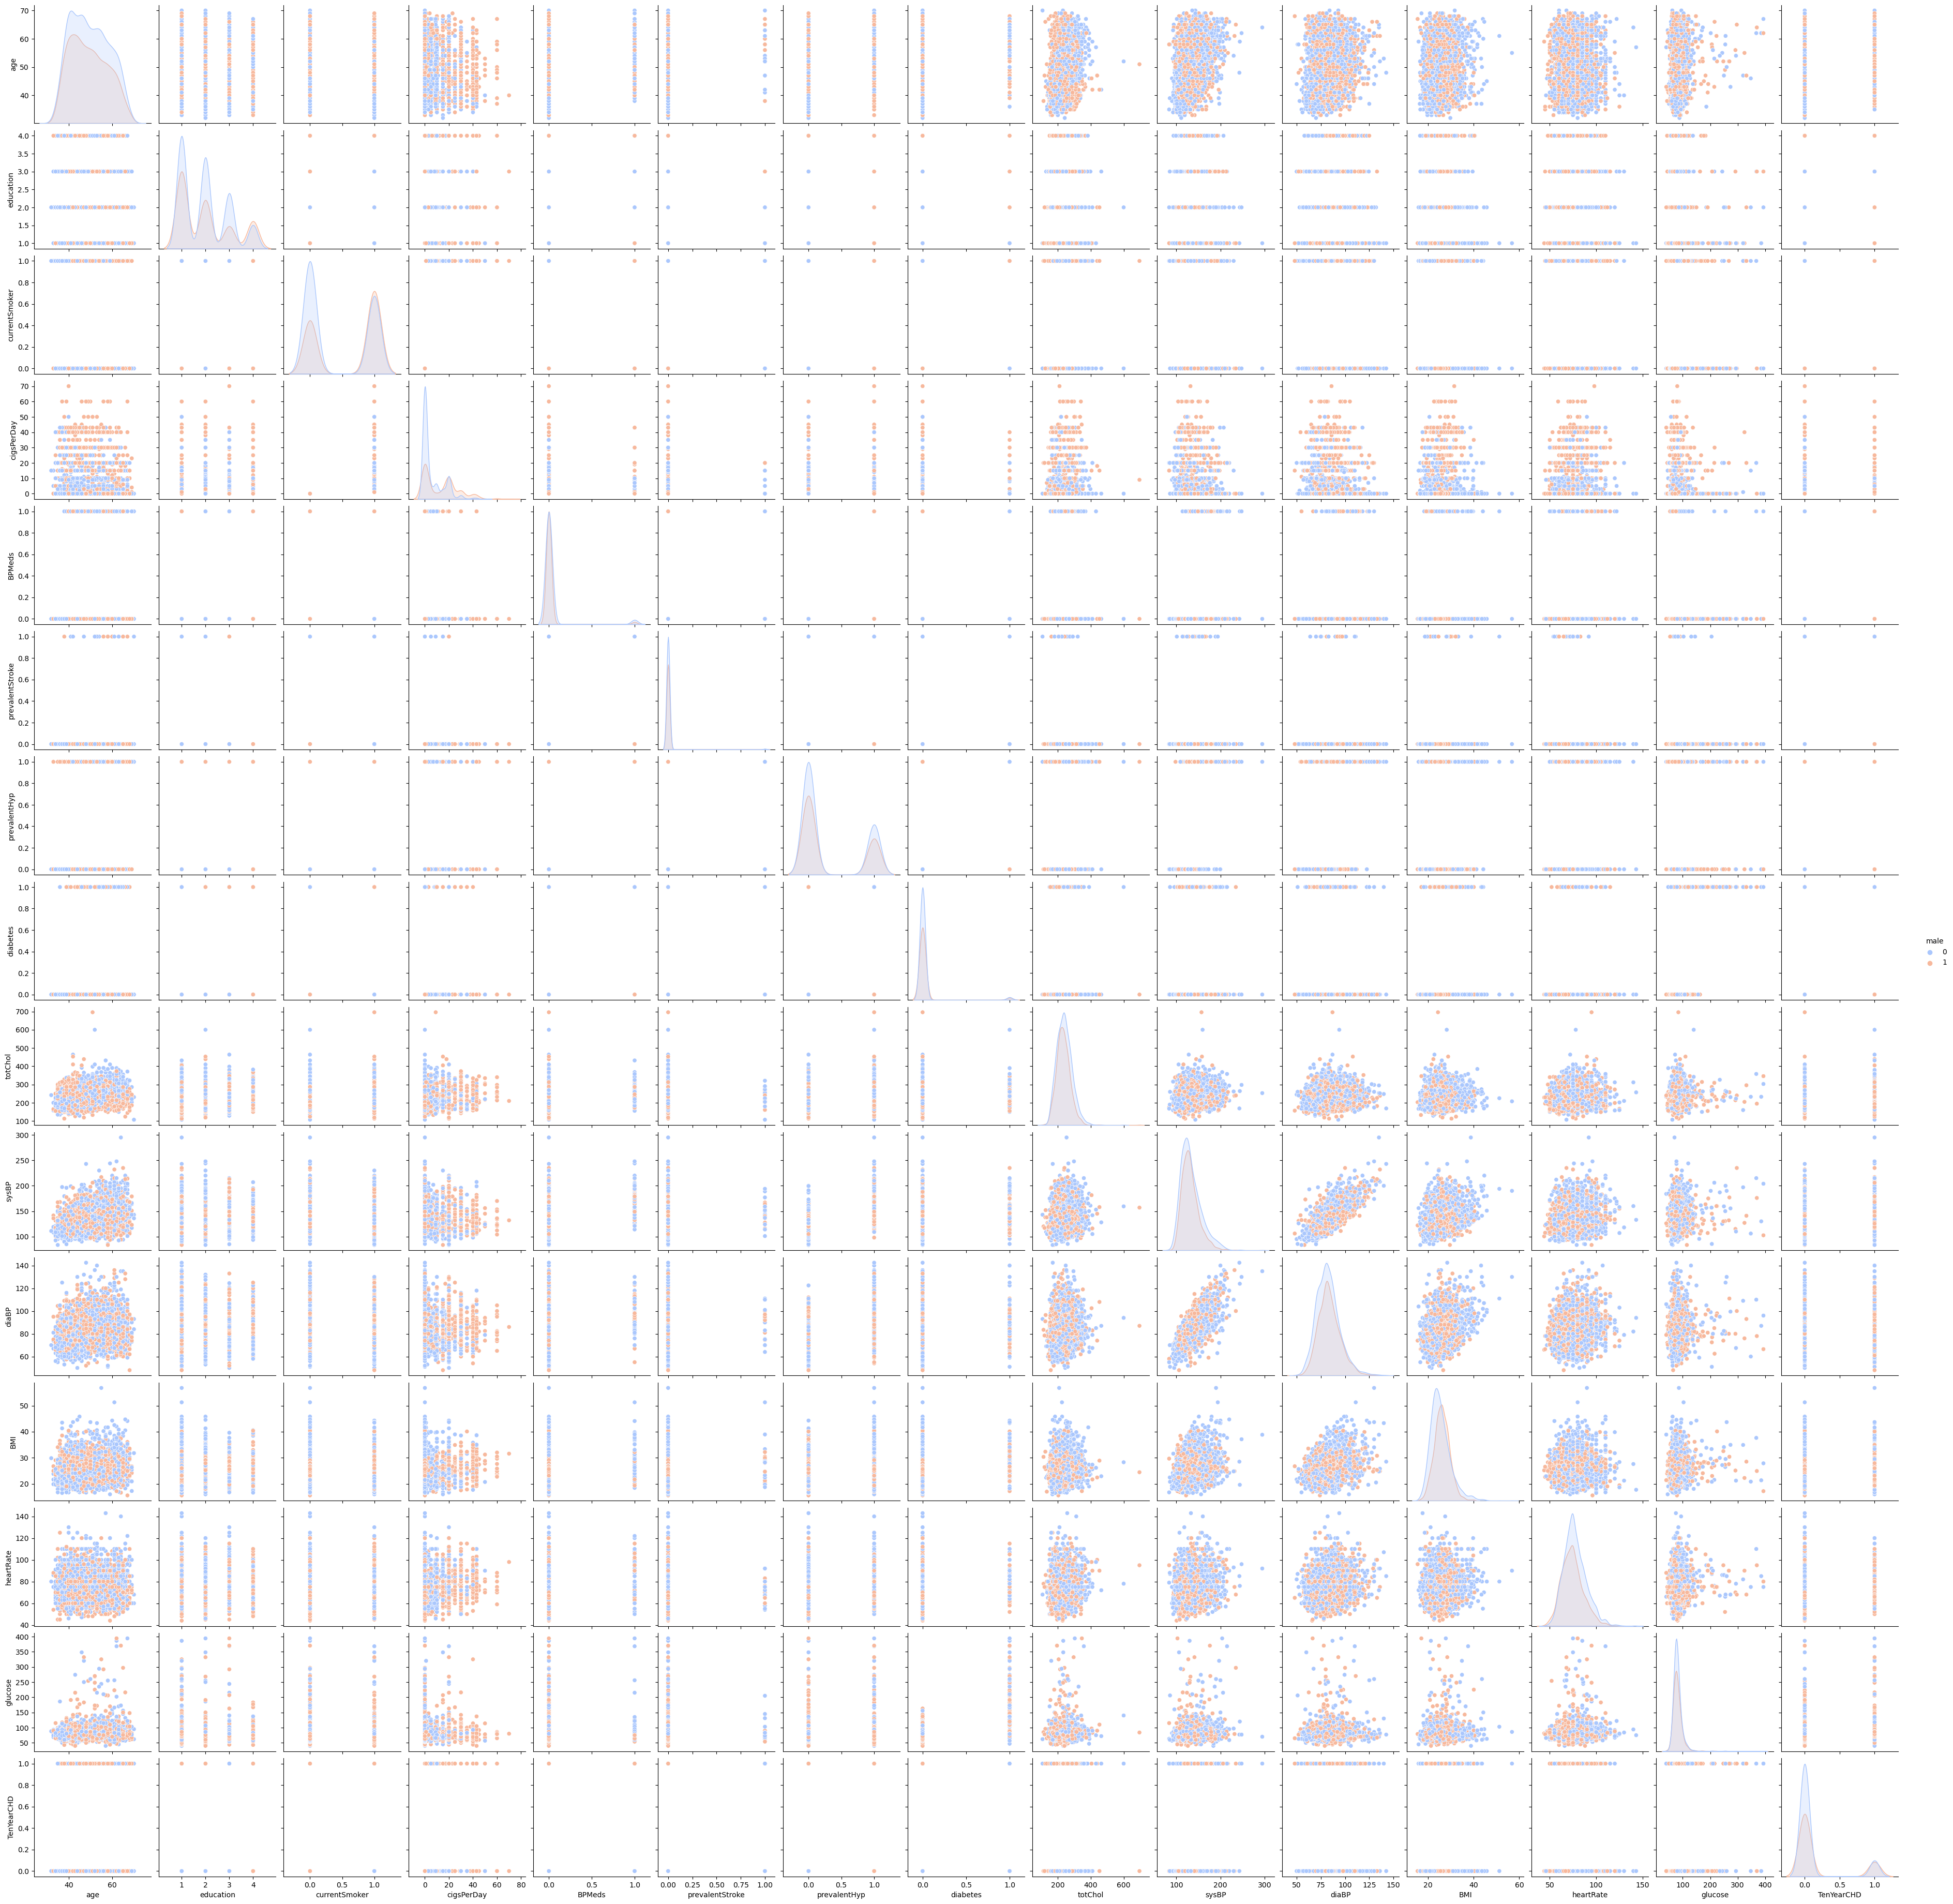

In [11]:
sns.pairplot(disease,hue='male',palette='coolwarm')

Text(0.5, 0, 'age')

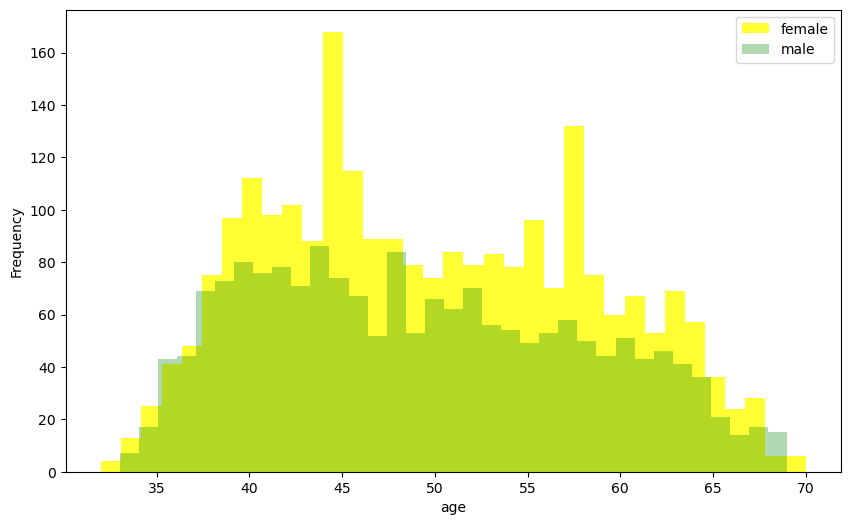

In [21]:
plt.figure(figsize=(10,6))
disease[disease['male']==0]['age'].plot.hist(alpha=0.8,bins=35,color='yellow',label='female')
disease[disease['male']==1]['age'].plot.hist(alpha=0.3,bins=35,color='green',label='male')
plt.legend()
plt.xlabel('age')

<Axes: xlabel='cigsPerDay', ylabel='count'>

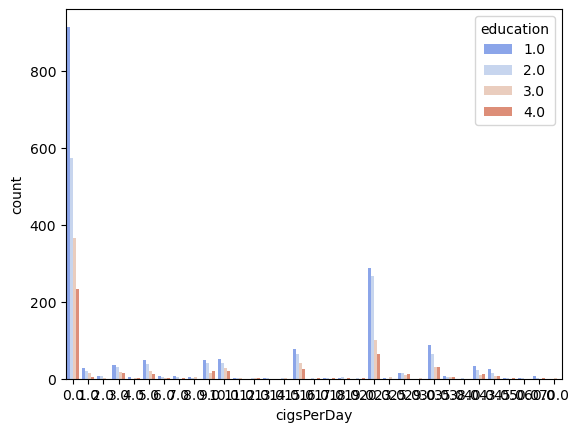

In [26]:
sns.countplot(x='cigsPerDay',hue='education',palette='coolwarm',data=disease)

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
y=disease['TenYearCHD']
x=disease.drop('TenYearCHD',axis=1)

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
random=RandomForestClassifier(n_estimators=600)

In [12]:
disease['education'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
4235    False
4236    False
4237    False
4238    False
4239    False
Name: education, Length: 4240, dtype: bool

In [55]:
disease['currentSmoker'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
4235    False
4236    False
4237    False
4238    False
4239    False
Name: currentSmoker, Length: 4240, dtype: bool

In [56]:
disease.isnull()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4236,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4237,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4238,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [57]:
disease.isnull().value_counts()

male   age    education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP  BMI    heartRate  glucose  TenYearCHD
False  False  False      False          False       False   False            False         False     False    False  False  False  False      False    False         4240
dtype: int64

In [16]:
disease['education'].isnull().value_counts()

False    4135
True      105
Name: education, dtype: int64

In [17]:
disease['education'].fillna(value=disease['education'].mean())

0       4.0
1       2.0
2       1.0
3       3.0
4       3.0
       ... 
4235    2.0
4236    1.0
4237    2.0
4238    3.0
4239    3.0
Name: education, Length: 4240, dtype: float64

In [18]:
disease['education'].isnull().value_counts()

False    4135
True      105
Name: education, dtype: int64

In [19]:
disease.isnull().value_counts()

male   age    education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP  BMI    heartRate  glucose  TenYearCHD
False  False  False      False          False       False   False            False         False     False    False  False  False  False      False    False         3658
                                                                                                                                              True     False          331
              True       False          False       False   False            False         False     False    False  False  False  False      False    False           93
              False      False          False       True    False            False         False     False    False  False  False  False      False    False           51
                                                    False   False            False         False     True     False  False  False  False      True     False  

In [20]:

disease['education'] = disease['education'].apply(lambda x: disease['education'].mean() if pd.isnull(x) else x)


In [21]:
disease['education'].isnull().value_counts()

False    4240
Name: education, dtype: int64

In [22]:
disease['male'].isnull().value_counts()

False    4240
Name: male, dtype: int64

In [23]:
disease['age'].isnull().value_counts()

False    4240
Name: age, dtype: int64

In [24]:
disease['currentSmoker'].isnull().value_counts()

False    4240
Name: currentSmoker, dtype: int64

In [25]:
disease['cigsPerDay'].isnull().value_counts()

False    4211
True       29
Name: cigsPerDay, dtype: int64

In [26]:
disease['cigsPerDay']=disease['cigsPerDay'].apply(lambda x:0.0 if pd.isnull(x) else x)

In [27]:
disease['cigsPerDay'].isnull().value_counts()

False    4240
Name: cigsPerDay, dtype: int64

In [28]:
disease['BPMeds'].isnull().value_counts()

False    4187
True       53
Name: BPMeds, dtype: int64

In [29]:
disease['BPMeds']=disease['BPMeds'].apply(lambda x:0.0 if pd.isnull(x) else x)

In [30]:
disease['BPMeds'].isnull().value_counts()

False    4240
Name: BPMeds, dtype: int64

In [31]:
disease['prevalentStroke'].isnull().value_counts()

False    4240
Name: prevalentStroke, dtype: int64

In [32]:
disease['prevalentHyp'].isnull().value_counts()

False    4240
Name: prevalentHyp, dtype: int64

In [33]:
disease['diabetes'].isnull().value_counts()

False    4240
Name: diabetes, dtype: int64

In [34]:
disease['totChol'].isnull().value_counts()

False    4190
True       50
Name: totChol, dtype: int64

In [35]:
disease['totChol']=disease['totChol'].apply(lambda x:disease['totChol'].mean() if pd.isnull(x) else x)

In [36]:
disease['totChol'].isnull().value_counts()

False    4240
Name: totChol, dtype: int64

In [37]:
disease['sysBP'].isnull().value_counts()

False    4240
Name: sysBP, dtype: int64

In [38]:
disease['diaBP'].isnull().value_counts()

False    4240
Name: diaBP, dtype: int64

In [39]:
disease['BMI'].isnull().value_counts()

False    4221
True       19
Name: BMI, dtype: int64

In [40]:
disease['BMI']=disease['BMI'].apply(lambda x:disease['BMI'].mean() if pd.isnull(x) else x)

In [41]:
disease['BMI'].isnull().value_counts()

False    4240
Name: BMI, dtype: int64

In [42]:
disease['heartRate'].isnull().value_counts()

False    4239
True        1
Name: heartRate, dtype: int64

In [43]:
disease['heartRate']=disease['heartRate'].apply(lambda x:disease['heartRate'].mean() if pd.isnull(x) else x)

In [44]:
disease['heartRate'].isnull().value_counts()

False    4240
Name: heartRate, dtype: int64

In [54]:
disease['glucose'].isnull().value_counts()

False    4240
Name: glucose, dtype: int64

In [52]:
disease['glucose']=disease['glucose'].apply(lambda x:disease['glucose'].mean() if pd.isnull(x) else x)

In [51]:
disease['glucose'].isnull().value_counts()

False    4240
Name: glucose, dtype: int64

In [50]:
disease.isnull().value_counts()

male   age    education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP  BMI    heartRate  glucose  TenYearCHD
False  False  False      False          False       False   False            False         False     False    False  False  False  False      False    False         4240
dtype: int64

In [64]:
random.fit(x_train,y_train)

RandomForestClassifier(n_estimators=600)

In [65]:
pred=random.predict(x_test)

In [66]:
from sklearn.metrics import classification_report,confusion_matrix

In [67]:
print(confusion_matrix(y_test,pred))

[[1080    5]
 [ 176   11]]


In [68]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1085
           1       0.69      0.06      0.11       187

    accuracy                           0.86      1272
   macro avg       0.77      0.53      0.52      1272
weighted avg       0.83      0.86      0.80      1272



In [70]:
import pickle
with open('traning.pkl','wb') as f:
    pickle.dump(random,f)